In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTXozjkuDg6tdEVyyVGZhzdCHwwLTWdl5T0jyc7acdwHZgPGpyYcPGbMvuLPmPqew/pub?gid=1933466057&single=true&output=csv')

df_sur = df[df["Región"] == "Sur"]

#para corregir "Descuento", reemplazando "," por "."
df["Descuento"] = df["Descuento"].str.replace(",", ".")
df["Descuento"] = df["Descuento"].astype("float64")
df_sur["Descuento"] = pd.to_numeric(df_sur["Descuento"].str.replace(",", ".").str.strip(), errors="coerce")

print(df_sur["Descuento"].dtype)
print(df["Descuento"].dtype)
print(df["Descuento"].head())

print(df_sur.info())



float64
float64
0    0.43
1    0.14
2    0.46
3    0.46
4    0.51
Name: Descuento, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 2982 entries, 0 to 10253
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id. de la fila        2982 non-null   int64  
 1   Id. del pedido        2982 non-null   object 
 2   Fecha del pedido      2982 non-null   object 
 3   Fecha de envío        2982 non-null   object 
 4   Fecha de facturacion  2982 non-null   object 
 5   Año                   2982 non-null   int64  
 6   Forma de envío        2982 non-null   object 
 7   Id. del cliente       2982 non-null   object 
 8   Nombre del cliente    2982 non-null   object 
 9   Segmento              2982 non-null   object 
 10  Ciudad                2982 non-null   object 
 11  Estado                2982 non-null   object 
 12  País                  2982 non-null   object 
 13  Región                2982 no

/tmp/ipython-input-1802514025.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur["Descuento"] = pd.to_numeric(df_sur["Descuento"].str.replace(",", ".").str.strip(), errors="coerce")


In [ ]:
#Información general:

# Información general del DataFrame filtrado (Región = Sur)

print("Dimensiones del DataFrame:", df_sur.shape)  # filas y columnas
print("\nTipos de datos y valores nulos:")
print(df_sur.info())  # tipos de datos, non-null count, memoria

# Conteo de valores nulos por columna

print("\nValores nulos por columna:")
print(df_sur.isnull().sum())

Dimensiones del DataFrame: (2982, 22)

Tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 2982 entries, 0 to 10253
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id. de la fila        2982 non-null   int64  
 1   Id. del pedido        2982 non-null   object 
 2   Fecha del pedido      2982 non-null   object 
 3   Fecha de envío        2982 non-null   object 
 4   Fecha de facturacion  2982 non-null   object 
 5   Año                   2982 non-null   int64  
 6   Forma de envío        2982 non-null   object 
 7   Id. del cliente       2982 non-null   object 
 8   Nombre del cliente    2982 non-null   object 
 9   Segmento              2982 non-null   object 
 10  Ciudad                2982 non-null   object 
 11  Estado                2982 non-null   object 
 12  País                  2982 non-null   object 
 13  Región                2982 non-null   object 
 14  Id. d

In [ ]:
# Estadísticas descriptivas

stats = df_sur[["Venta", "Cantidad", "Descuento", "Ganancia"]].describe()

# Agregar la mediana
median_values = df_sur[["Venta", "Cantidad", "Descuento", "Ganancia"]].median()

# Unir ambos resultados
stats.loc["median"] = median_values

print(stats)

               Venta     Cantidad    Descuento      Ganancia
count    2982.000000  2982.000000  2982.000000   2982.000000
mean     2069.000000     3.797451     0.500899     94.825956
std      3437.498079     2.214864     0.285242   1403.984975
min        16.000000     1.000000     0.000000 -18062.000000
25%       319.000000     2.000000     0.250000    -78.750000
50%       783.000000     3.000000     0.500000     60.000000
75%      2319.750000     5.000000     0.750000    296.000000
max     34731.000000    14.000000     1.000000   9881.000000
median    783.000000     3.000000     0.500000     60.000000


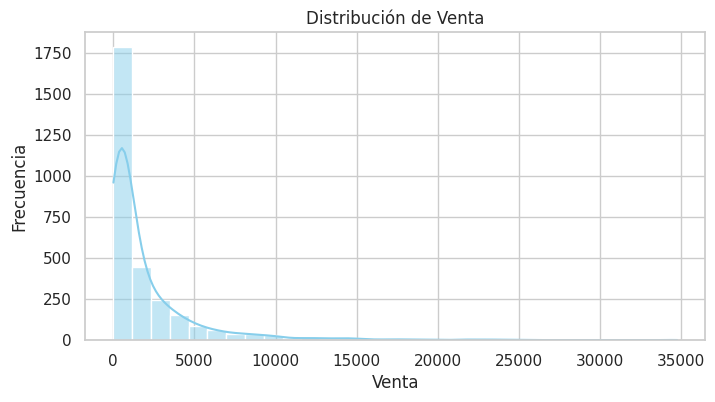

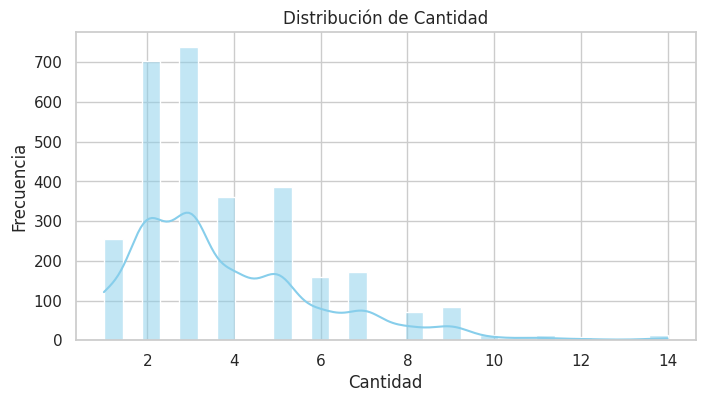

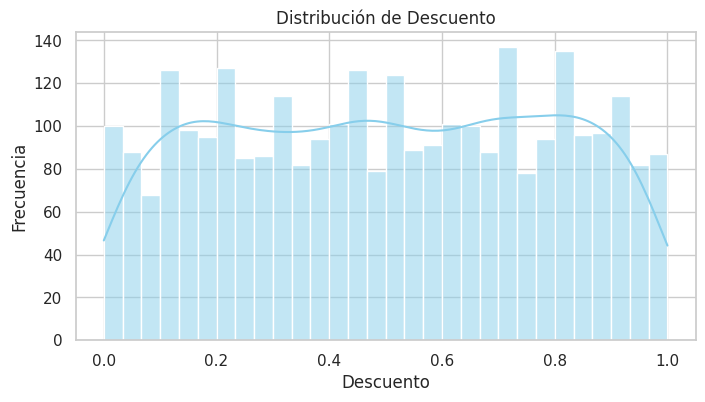

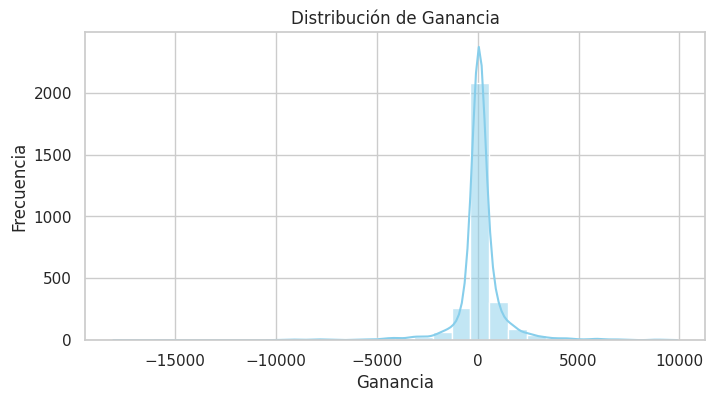

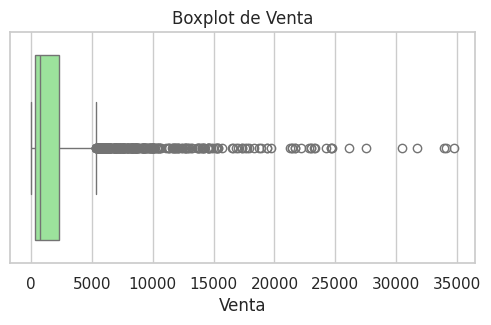

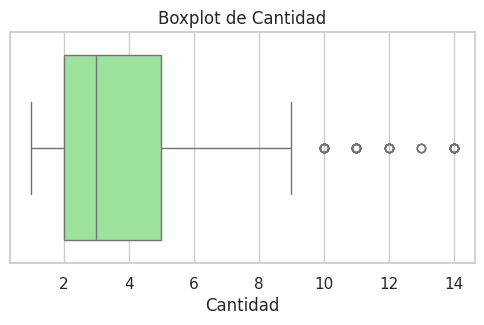

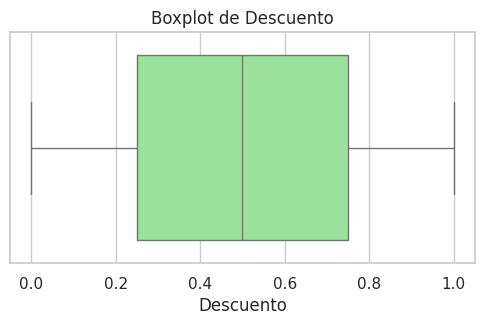

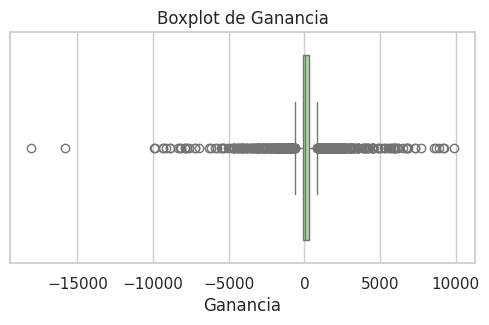

In [ ]:
#Distribucion de variables:

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid")

# Lista de columnas numéricas
numeric_cols = ["Venta", "Cantidad", "Descuento", "Ganancia"]

# Histograma para cada variable

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_sur[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Boxplots para detectar outliers

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_sur[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

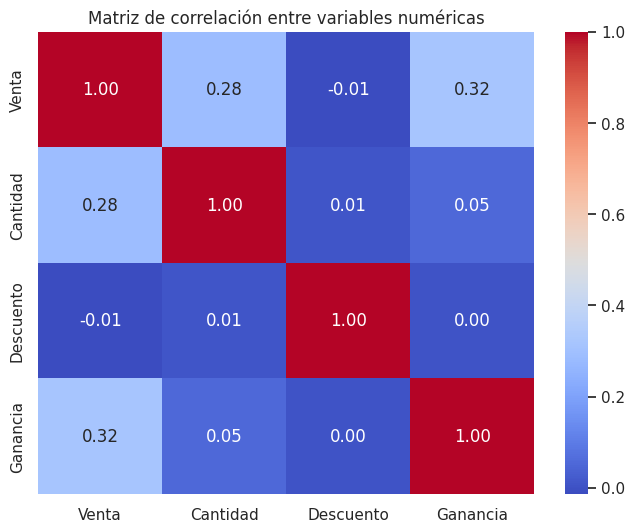

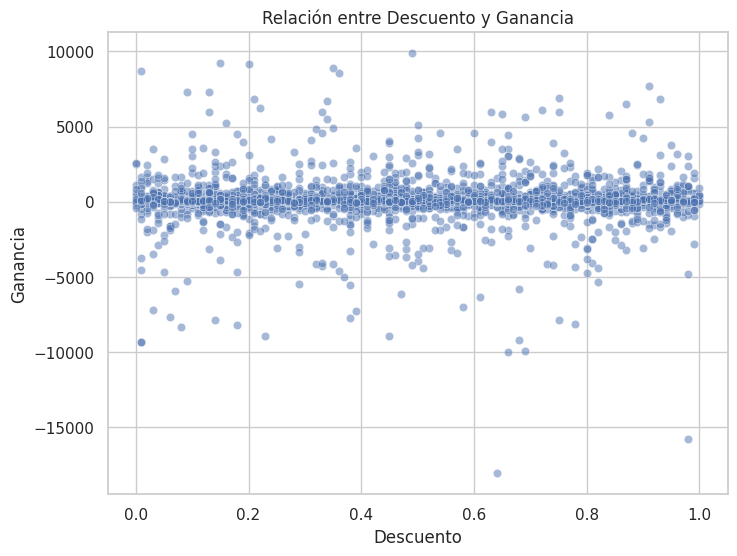

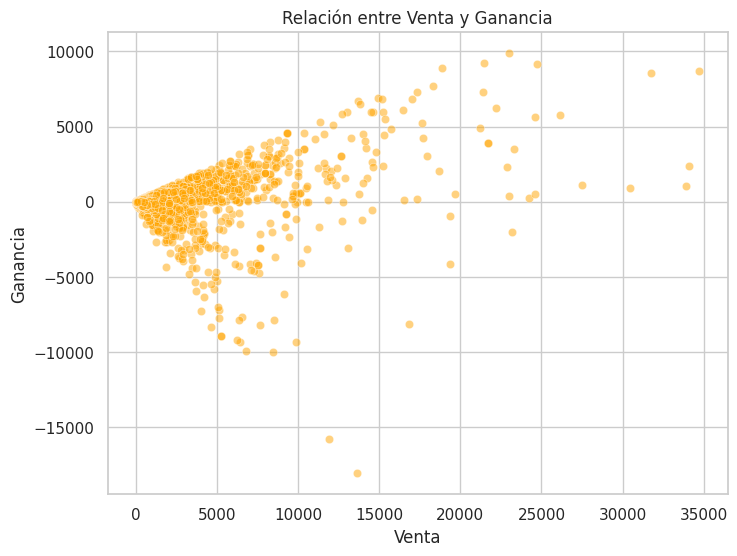

In [ ]:
#Relaciones entre Variables:

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas numéricas
numeric_cols = ["Venta", "Cantidad", "Descuento", "Ganancia"]

# 1. Matriz de correlación

plt.figure(figsize=(8,6))
corr = df_sur[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

# 2. Scatter plots para relaciones clave

plt.figure(figsize=(8,6))
sns.scatterplot(x="Descuento", y="Ganancia", data=df_sur, alpha=0.5)
plt.title("Relación entre Descuento y Ganancia")
plt.xlabel("Descuento")
plt.ylabel("Ganancia")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x="Venta", y="Ganancia", data=df_sur, alpha=0.5, color="orange")
plt.title("Relación entre Venta y Ganancia")
plt.xlabel("Venta")
plt.ylabel("Ganancia")
plt.show()

                       Venta  Ganancia
Categoría                             
Mobiliario           2514321     59013
Tecnología           2107111    123772
Material de oficina  1548326     99986


/tmp/ipython-input-1992815592.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_summary.index, y=cat_summary["Venta"], palette="viridis")


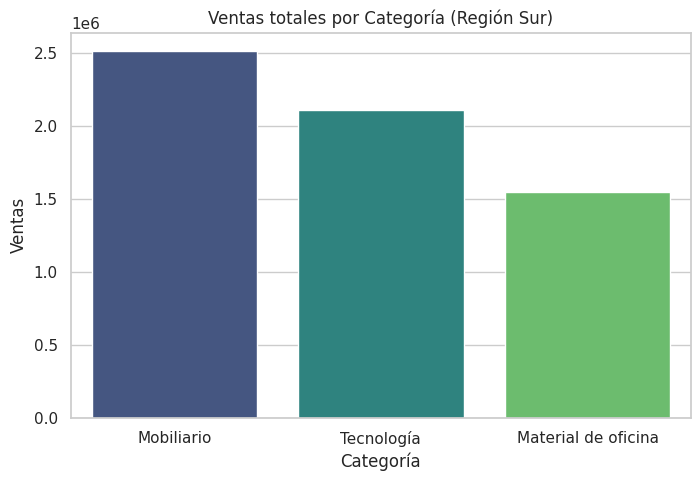

/tmp/ipython-input-1992815592.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_summary.index, y=cat_summary["Ganancia"], palette="magma")


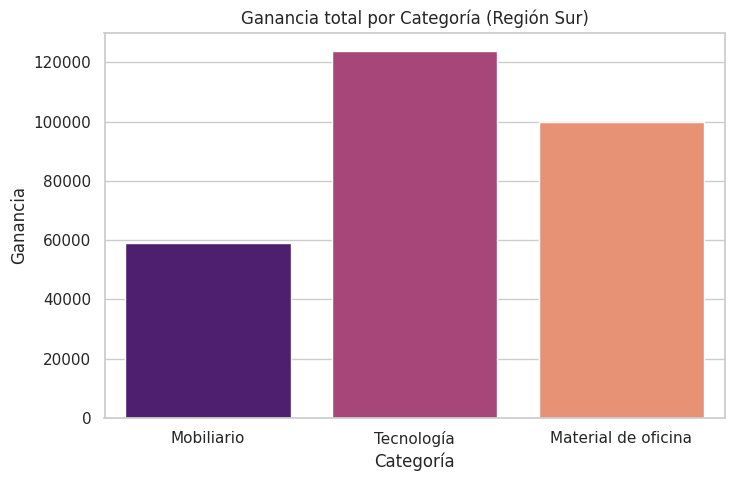

/tmp/ipython-input-1992815592.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_summary.index, y=subcat_summary["Venta"], palette="coolwarm")


                    Venta  Ganancia
Subcategoría                       
Sillas             954577     98717
Librerías          907513     68565
Copiadoras         900767     59829
Teléfonos          702667     -5603
Electrodomésticos  517287     42264
Mesas              458355   -134150
Accesorios         372286     61159
Almacenamiento     371506     12564
Mobiliario         193876     25881
Suministros        134141     15557
Máquinas           131391      8387
Sobres             120239      3590
Arte               113406      6206
Papel              105741      9096
Carpetas           100049      2444
Grapas              51635      4075
Etiquetas           34322      4190


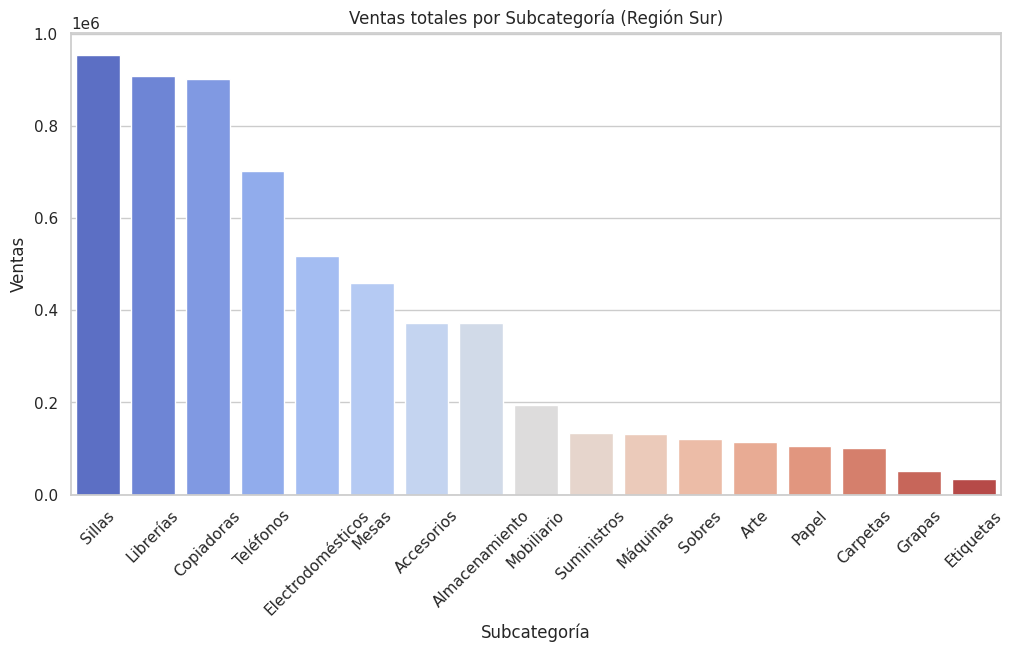

In [ ]:
#Analisis Categorico:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ventas y ganancias por Categoría
cat_summary = df_sur.groupby("Categoría")[["Venta", "Ganancia"]].sum().sort_values("Venta", ascending=False)
print(cat_summary)

plt.figure(figsize=(8,5))
sns.barplot(x=cat_summary.index, y=cat_summary["Venta"], palette="viridis")
plt.title("Ventas totales por Categoría (Región Sur)")
plt.ylabel("Ventas")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=cat_summary.index, y=cat_summary["Ganancia"], palette="magma")
plt.title("Ganancia total por Categoría (Región Sur)")
plt.ylabel("Ganancia")
plt.show()

# 2. Ventas por Subcategoría
subcat_summary = df_sur.groupby("Subcategoría")[["Venta", "Ganancia"]].sum().sort_values("Venta", ascending=False)
print(subcat_summary)

plt.figure(figsize=(12,6))
sns.barplot(x=subcat_summary.index, y=subcat_summary["Venta"], palette="coolwarm")
plt.title("Ventas totales por Subcategoría (Región Sur)")
plt.xticks(rotation=45)
plt.ylabel("Ventas")
plt.show()

/tmp/ipython-input-3104657692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['Fecha del pedido'] = pd.to_datetime(df_sur['Fecha del pedido'], errors='coerce')
/tmp/ipython-input-3104657692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['Fecha de envío'] = pd.to_datetime(df_sur['Fecha de envío'], errors='coerce')
/tmp/ipython-input-3104657692.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to

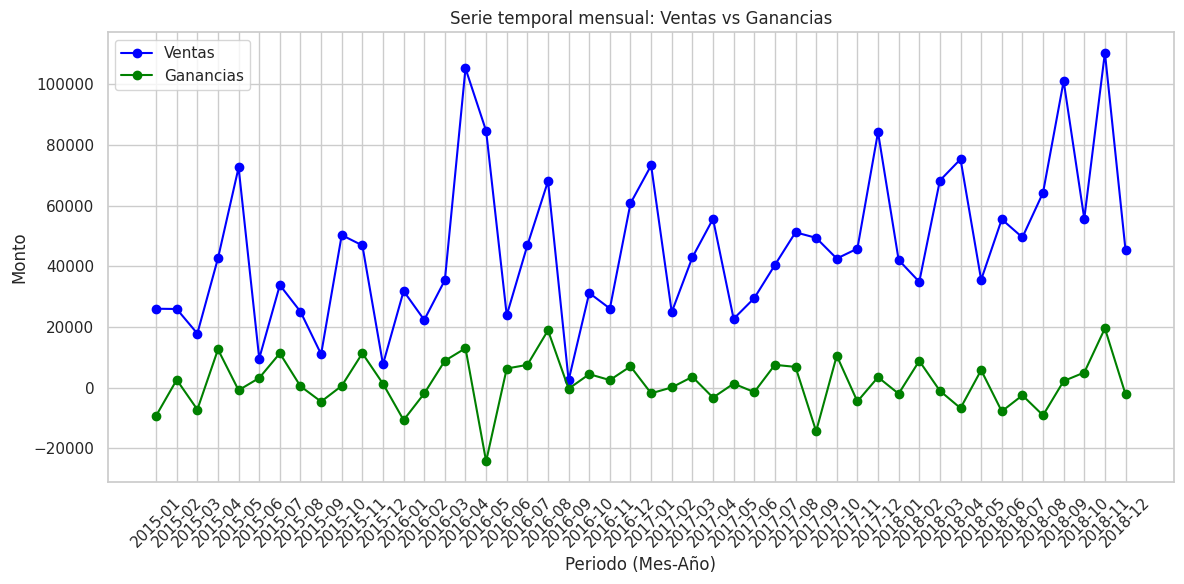

/tmp/ipython-input-3104657692.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['Trimestre'] = df_sur['Fecha del pedido'].dt.to_period('Q')


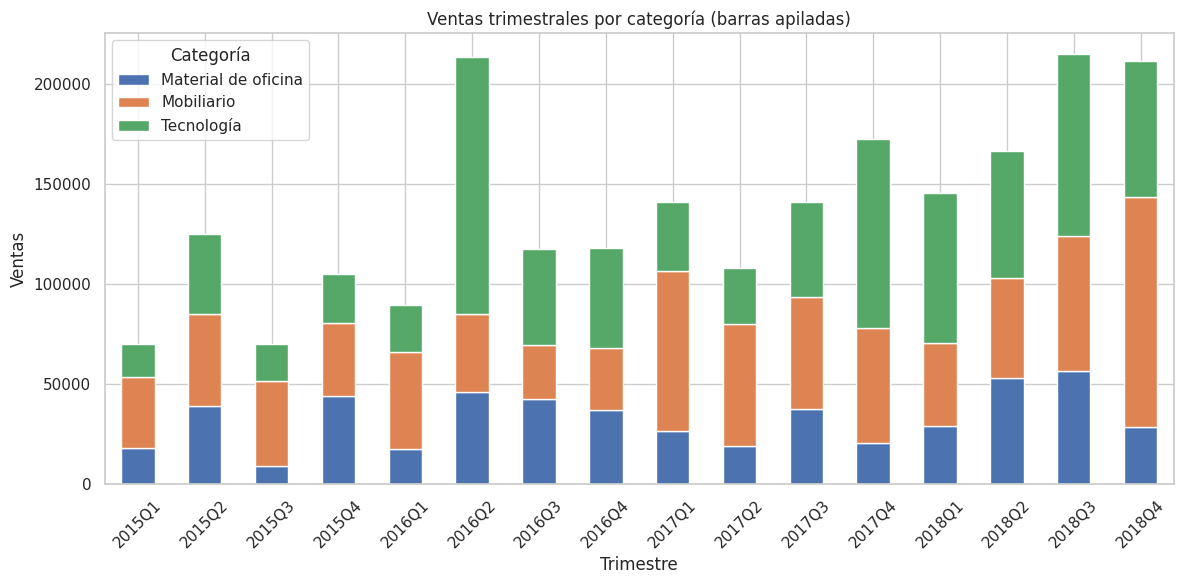

In [ ]:
#Series Temporales:

import pandas as pd
import matplotlib.pyplot as plt

# Convertir fechas en df_sur
df_sur['Fecha del pedido'] = pd.to_datetime(df_sur['Fecha del pedido'], errors='coerce')
df_sur['Fecha de envío'] = pd.to_datetime(df_sur['Fecha de envío'], errors='coerce')
df_sur['Fecha de facturacion'] = pd.to_datetime(df_sur['Fecha de facturacion'], errors='coerce')

# Inspección
#print("Dimensiones del DataFrame:", df_sur.shape)
#print("\nTipos de datos y valores nulos:")
#print(df_sur.info())

# Verificación de tipos de las columnas de fecha
#print(df_sur[['Fecha del pedido','Fecha de envío','Fecha de facturacion']].dtypes)

import pandas as pd
import matplotlib.pyplot as plt

# Crear columna de periodo (año-mes) a partir de la fecha del pedido
df_sur['Periodo'] = df_sur['Fecha del pedido'].dt.to_period('M')

# Agrupar por periodo y sumar ventas y ganancias
serie = df_sur.groupby('Periodo')[['Venta','Ganancia']].sum()

# Graficar la serie temporal
plt.figure(figsize=(12,6))
plt.plot(serie.index.astype(str), serie['Venta'], label='Ventas', color='blue', marker='o')
plt.plot(serie.index.astype(str), serie['Ganancia'], label='Ganancias', color='green', marker='o')

# Personalización del gráfico
plt.xticks(rotation=45)
plt.xlabel('Periodo (Mes-Año)')
plt.ylabel('Monto')
plt.title('Serie temporal mensual: Ventas vs Ganancias')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

    #---------

import pandas as pd
import matplotlib.pyplot as plt

# Crear columna de trimestre a partir de la fecha del pedido
df_sur['Trimestre'] = df_sur['Fecha del pedido'].dt.to_period('Q')

# Agrupar por trimestre y categoría, sumar ventas
ventas_trimestre = df_sur.groupby(['Trimestre','Categoría'])['Venta'].sum().unstack(fill_value=0)

# Graficar barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(12,6))

# Personalización del gráfico
plt.xlabel('Trimestre')
plt.ylabel('Ventas')
plt.title('Ventas trimestrales por categoría (barras apiladas)')
plt.legend(title='Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# ================================
# 1. Cargar dataset
# ================================
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTXozjkuDg6tdEVyyVGZhzdCHwwLTWdl5T0jyc7acdwHZgPGpyYcPGbMvuLPmPqew/pub?gid=1933466057&single=true&output=csv'
df = pd.read_csv(url)

# ================================
# 2. Convertir columnas de fechas
# ================================
df["Fecha del pedido"] = pd.to_datetime(df["Fecha del pedido"], dayfirst=True)
df["Fecha de envío"] = pd.to_datetime(df["Fecha de envío"], dayfirst=True)
df["Fecha de facturacion"] = pd.to_datetime(df["Fecha de facturacion"], dayfirst=True)

# ================================
# 3. Ingeniería de atributos
# ================================
df["pedido_dia_semana"] = df["Fecha del pedido"].dt.dayofweek
df["pedido_mes"] = df["Fecha del pedido"].dt.month
df["pedido_trimestre"] = df["Fecha del pedido"].dt.quarter
df["pedido_fin_de_semana"] = df["Fecha del pedido"].dt.dayofweek.isin([5,6]).astype(int)

df["tiempo_envio"] = (df["Fecha de envío"] - df["Fecha del pedido"]).dt.days
df["envio_dia_semana"] = df["Fecha de envío"].dt.dayofweek
df["envio_rapido"] = (df["tiempo_envio"] <= 2).astype(int)

df["tiempo_facturacion"] = (df["Fecha de facturacion"] - df["Fecha del pedido"]).dt.days
df["facturacion_mes"] = df["Fecha de facturacion"].dt.month
df["facturacion_fin_de_mes"] = (df["Fecha de facturacion"].dt.day > 25).astype(int)

df["dias_entre_envio_y_facturacion"] = (df["Fecha de facturacion"] - df["Fecha de envío"]).dt.days

def asignar_estacion(mes):
    if mes in [12, 1, 2]: return "Verano"
    elif mes in [3, 4, 5]: return "Otoño"
    elif mes in [6, 7, 8]: return "Invierno"
    else: return "Primavera"

df["estacionalidad"] = df["Fecha del pedido"].dt.month.apply(asignar_estacion)

# Variables de cálculo (OJO: Pueden causar Data Leakage si se busca predecir Venta pura)
df["precio_unitario"] = df["Venta"] / df["Cantidad"]
df["margen_ganancia"] = df["Ganancia"] / df["Venta"]
df["ganancia_por_unidad"] = df["Ganancia"] / df["Cantidad"]

# ==========================================
# 4. Encoding y Automatización de Features
# ==========================================
# Aplicamos One-Hot Encoding solo a columnas categóricas clave
categoricas_clave = ["Forma de envío", "estacionalidad", "Categoría", "Región"]
df_encoded = pd.get_dummies(df, columns=categoricas_clave, drop_first=True)

# Definimos el Target
y = df_encoded["Venta"].fillna(0)

# AUTOMATIZACIÓN: Filtramos solo columnas numéricas y eliminamos IDs/Target
X = df_encoded.select_dtypes(include=[np.number]).drop(columns=[
    "Venta", "Id. de la fila", "Id. del pedido", "Id. del cliente",
    "Id. del producto"
], errors='ignore')

# Limpieza final de valores infinitos o nulos resultantes de cálculos
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

print(f"Dataset procesado: {X.shape[1]} variables predictoras identificadas.\n")

# ================================
# 5. Configuración de Validación Cruzada
# ================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def ejecutar_cv(modelo, nombre):
    mse = cross_val_score(modelo, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2 = cross_val_score(modelo, X, y, cv=kf, scoring='r2')
    print(f"=== {nombre} ===")
    print(f"MSE promedio: {-mse.mean():.2f}")
    print(f"R² promedio: {r2.mean():.4f}\n")

# ================================
# 6. Ejecución de Modelos
# ================================
ejecutar_cv(LinearRegression(), "Regresión Lineal")
ejecutar_cv(RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1), "Random Forest")

Dataset procesado: 17 variables predictoras identificadas.

=== Regresión Lineal ===
MSE promedio: 2174437.70
R² promedio: 0.8224

=== Random Forest ===
MSE promedio: 53363.66
R² promedio: 0.9957



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ================================
# 1. Cargar y Preprocesar
# ================================
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTXozjkuDg6tdEVyyVGZhzdCHwwLTWdl5T0jyc7acdwHZgPGpyYcPGbMvuLPmPqew/pub?gid=1933466057&single=true&output=csv'
df = pd.read_csv(url)

# Convertir 'Descuento' a numérico (importante si se recarga el df)
df["Descuento"] = df["Descuento"].str.replace(",", ".")
df["Descuento"] = df["Descuento"].astype("float64")

# Convertir columnas de fechas
df["Fecha del pedido"] = pd.to_datetime(df["Fecha del pedido"], dayfirst=True)
df["Fecha de envío"] = pd.to_datetime(df["Fecha de envío"], dayfirst=True)
df["Fecha de facturacion"] = pd.to_datetime(df["Fecha de facturacion"], dayfirst=True)

# Ingeniería de atributos (incluyendo los que faltaban)
df["pedido_dia_semana"] = df["Fecha del pedido"].dt.dayofweek
df["pedido_mes"] = df["Fecha del pedido"].dt.month
df["pedido_trimestre"] = df["Fecha del pedido"].dt.quarter
df["pedido_fin_de_semana"] = df["Fecha del pedido"].dt.dayofweek.isin([5,6]).astype(int)

df["tiempo_envio"] = (df["Fecha de envío"] - df["Fecha del pedido"]).dt.days
df["envio_dia_semana"] = df["Fecha de envío"].dt.dayofweek
df["envio_rapido"] = (df["tiempo_envio"] <= 2).astype(int)

df["tiempo_facturacion"] = (df["Fecha de facturacion"] - df["Fecha del pedido"]).dt.days
df["facturacion_mes"] = df["Fecha de facturacion"].dt.month
df["facturacion_fin_de_mes"] = (df["Fecha de facturacion"].dt.day > 25).astype(int)

df["dias_entre_envio_y_facturacion"] = (df["Fecha de facturacion"] - df["Fecha de envío"]).dt.days

def asignar_estacion(mes):
    if mes in [12, 1, 2]: return "Verano"
    elif mes in [3, 4, 5]: return "Otoño"
    elif mes in [6, 7, 8]: return "Invierno"
    else: return "Primavera"

df["estacionalidad"] = df["Fecha del pedido"].dt.month.apply(asignar_estacion)

df["precio_unitario"] = df["Venta"] / df["Cantidad"]
df["margen_ganancia"] = df["Ganancia"] / df["Venta"]
df["ganancia_por_unidad"] = df["Ganancia"] / df["Cantidad"]

# Encoding de categorías
categoricas = ["Forma de envío", "estacionalidad", "Categoría", "Región", "Segmento", "Ciudad", "Estado", "País", "Subcategoría"]
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# Definir X e y (Automatizando selección numérica)
y = df_encoded["Venta"].fillna(0)
X = df_encoded.select_dtypes(include=[np.number]).drop(columns=[
    "Venta", "Id. de la fila", "Id. del pedido", "Id. del cliente", "Id. del producto",
    "Año" # El año ya está en otras características temporales
], errors='ignore')

# Limpieza final de valores infinitos o nulos resultantes de cálculos
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# ==========================================
# 2. Evaluación de Modelos y Optimización
# ==========================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- A. Regresión Lineal ---
lin_model = LinearRegression()
r2_lin = cross_val_score(lin_model, X, y, cv=kf, scoring='r2').mean()
mse_lin = -cross_val_score(lin_model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

# --- B. Random Forest (Optimización con Grid Search) ---
print("Ejecutando Grid Search para optimizar Random Forest...")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=kf,
    scoring='r2'
)
grid_search.fit(X, y)

r2_rf = grid_search.best_score_
# Obtenemos el MSE del mejor modelo encontrado
mse_rf = -cross_val_score(grid_search.best_estimator_, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

# ==========================================
# 3. Presentación de Resultados (Comparativa)
# ==========================================
comparativa = pd.DataFrame({
    'Métrica': ['R² (Precisión)', 'MSE (Error Medio)'],
    'Regresión Lineal': [round(r2_lin, 4), round(mse_lin, 2)],
    'Random Forest (Optimizado)': [round(r2_rf, 4), round(mse_rf, 2)]
})

print("\n" + "="*45)
print("   RESULTADOS COMPARATIVOS DE LOS MODELOS")
print("="*45)
print(comparativa.to_string(index=False))
print("="*45)
print(f"Mejores parámetros RF: {grid_search.best_params_}")


# ==========================================
# 4. Predicción para el Futuro (2021)
# ==========================================

# Simulamos un escenario de ventas para 2021
# Tomamos una estructura base del dataset existente
datos_2021 = X.iloc[[0]].copy() # Crea una copia con las mismas columnas de X

# Modificamos los valores para representar un pedido en 2021
# Asegurarse de que todas las columnas usadas aquí existan en X
datos_2021["pedido_mes"] = 11               # Supongamos que es Noviembre 2021
datos_2021["Cantidad"] = 8                  # Esperamos vender 8 unidades
datos_2021["precio_unitario"] = 210.0       # Ajustamos por inflación respecto a 2019
datos_2021["tiempo_envio"] = 3              # Estimamos eficiencia logística
# Ajustar otras columnas si es necesario para el escenario 2021, manteniendo la estructura de X
# Por ejemplo, si hay dummies de 'estacionalidad', 'Región', etc., también deben ser ajustadas o replicadas.
# Para este ejemplo, solo modificamos las columnas numéricas que se establecieron.

# El modelo (entrenado con datos hasta 2019) predice la Venta:
prediccion_2021 = grid_search.best_estimator_.predict(datos_2021)

print("\n" + "="*45)
print("   PREDICCIÓN DE VENTAS PARA 2021")
print("="*45)
print(f"Escenario: Mes 11, Cantidad 8, Precio Unit. $210")
print(f"Venta Proyectada por Random Forest: ${prediccion_2021[0]:.2f}")
print("="*45)

Ejecutando Grid Search para optimizar Random Forest...

   RESULTADOS COMPARATIVOS DE LOS MODELOS
          Métrica  Regresión Lineal  Random Forest (Optimizado)
   R² (Precisión)            0.8223                      0.9597
MSE (Error Medio)      2175908.7700                 504693.3100
Mejores parámetros RF: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}

   PREDICCIÓN DE VENTAS PARA 2021
Escenario: Mes 11, Cantidad 8, Precio Unit. $210
Venta Proyectada por Random Forest: $1121.27
